In [2]:
import math
import random
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd
import scipy

import warnings 
warnings.filterwarnings('ignore')

## Normal Random Variable

In [3]:
'''정규분포 cdf의 역함수'''
def inv_normal_df(u):
    return stats.norm.ppf(u)

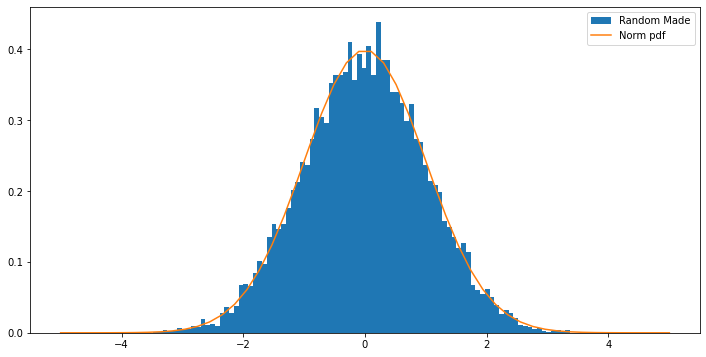

In [4]:
'''Uniform 분포 값 발생'''
random_num = [random.random() for x in range (10000)]

inv_normal_df_list = [inv_normal_df(u) for u in random_num]

histogram = np.histogram(inv_normal_df_list)
histogram_distribution = stats.rv_histogram(histogram)

x = np.linspace(-5, 5)
y = stats.norm.pdf(x)

plt.figure(figsize=(12,6))
plt.hist(inv_normal_df_list, density=True, bins=100, label='Random Made')
plt.plot(x, y, label='Norm pdf')
plt.legend()
plt.show()

## Exponential Random Variable

In [5]:
def inv_exponential_df(u, theta):
    return -np.log(1-u)/theta

def expon_pdf(u, theta):
    return theta * np.exp(-theta*u)

def expon_cdf(u, theta):
    return 1 - np.exp(-theta*u)

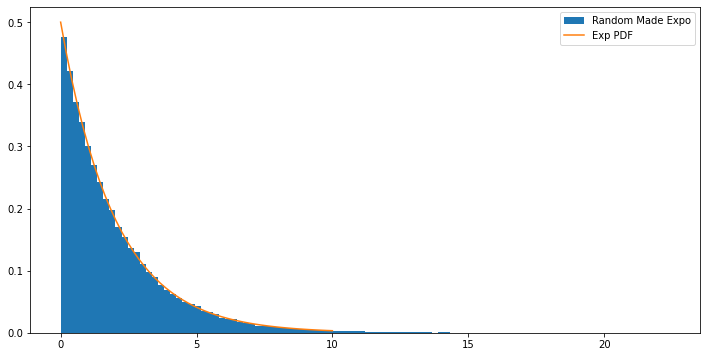

In [6]:
theta = 0.5

random_num = [random.random() for x in range (100000)]
inv_exp_list = [inv_exponential_df(x, theta) for x in random_num]

histogram = np.histogram(inv_exp_list)
histogram_distribution = stats.rv_histogram(histogram)

x = np.linspace(0, 10)
y = expon_pdf(x, theta)

plt.figure(figsize=(12,6))
plt.hist(inv_exp_list, bins=100, density=True, label='Random Made Expo')
plt.plot(x, y, label='Exp PDF')
plt.legend()
plt.show()

## Acceptance-Rejection Method

$$ f(x) \leq cg(x) $$

1. Generate $X$ from $g$
2. Generate $U$
3. Accept $X$ if $U \leq f(X)/cg(X)$

$$P(Y \in A) = \int_{A}^{} f(x)\, dx$$

In [7]:
def beta_func (u):
    if type(u) == list:

        def eq (u):
            return u**(3-1)*(1-u)**(2-1)

        value_list = []
        for i in u:
            beta = scipy.integrate.quad(lambda i: eq(i), 0, 1)[0]
            a = eq(i)
            value = 1/beta * a
            value_list.append(value)
        return value_list

    else:

        def eq (u):
            return u**(3-1)*(1-u)**(2-1)
            
        beta = scipy.integrate.quad(lambda u: eq(u), 0, 1)[0]
        a = eq(u)

        return 1/beta * a



In [8]:
c = beta_func(2/3)
c

1.7777777777777781

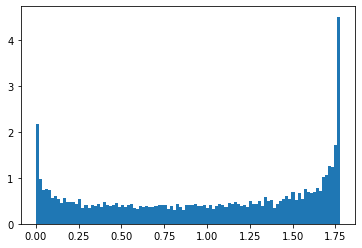

In [9]:
random_num = [random.random() for x in range (10000)]
beta_list = [beta_func(u) for u in random_num]

plt.hist(beta_list, density=True, bins=100, label='Random Made')
plt.show()

In [10]:
c = beta_func(2/3)
c

1.7777777777777781

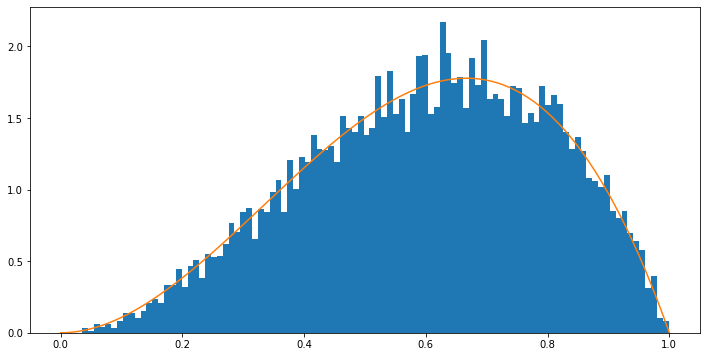

In [11]:
u1 = [random.random() for x in range(10000)]
u2 = [random.random() for x in range(10000)]



u2_list = []
while True:
    if len(u2_list) == 10000:
        break
    else:
        u1 = random.random()
        u2 = random.random()
        if c * u2 <= beta_func(u1):
            u2_list.append(u1)


plt.figure(figsize=(12,6))
plt.hist(u2_list, bins=100, density=True)
plt.plot(np.linspace(0,1,100), [beta_func(x) for x in np.linspace(0,1,100)])
plt.show()

## Box-Muller Method

In [12]:
def R (u):
    return -2 * np.log(u)

def V (u):
    return 2 * np.pi * u

def Z1 (R, V):
    return R ** (1/2) * np.cos(V)

def Z2 (R, V):
    return R ** (1/2) * np.sin(V)

def z1_for_circle (V):
    return np.cos(V)

def z2_for_circle (V):
    return np.sin(V)

<AxesSubplot:>

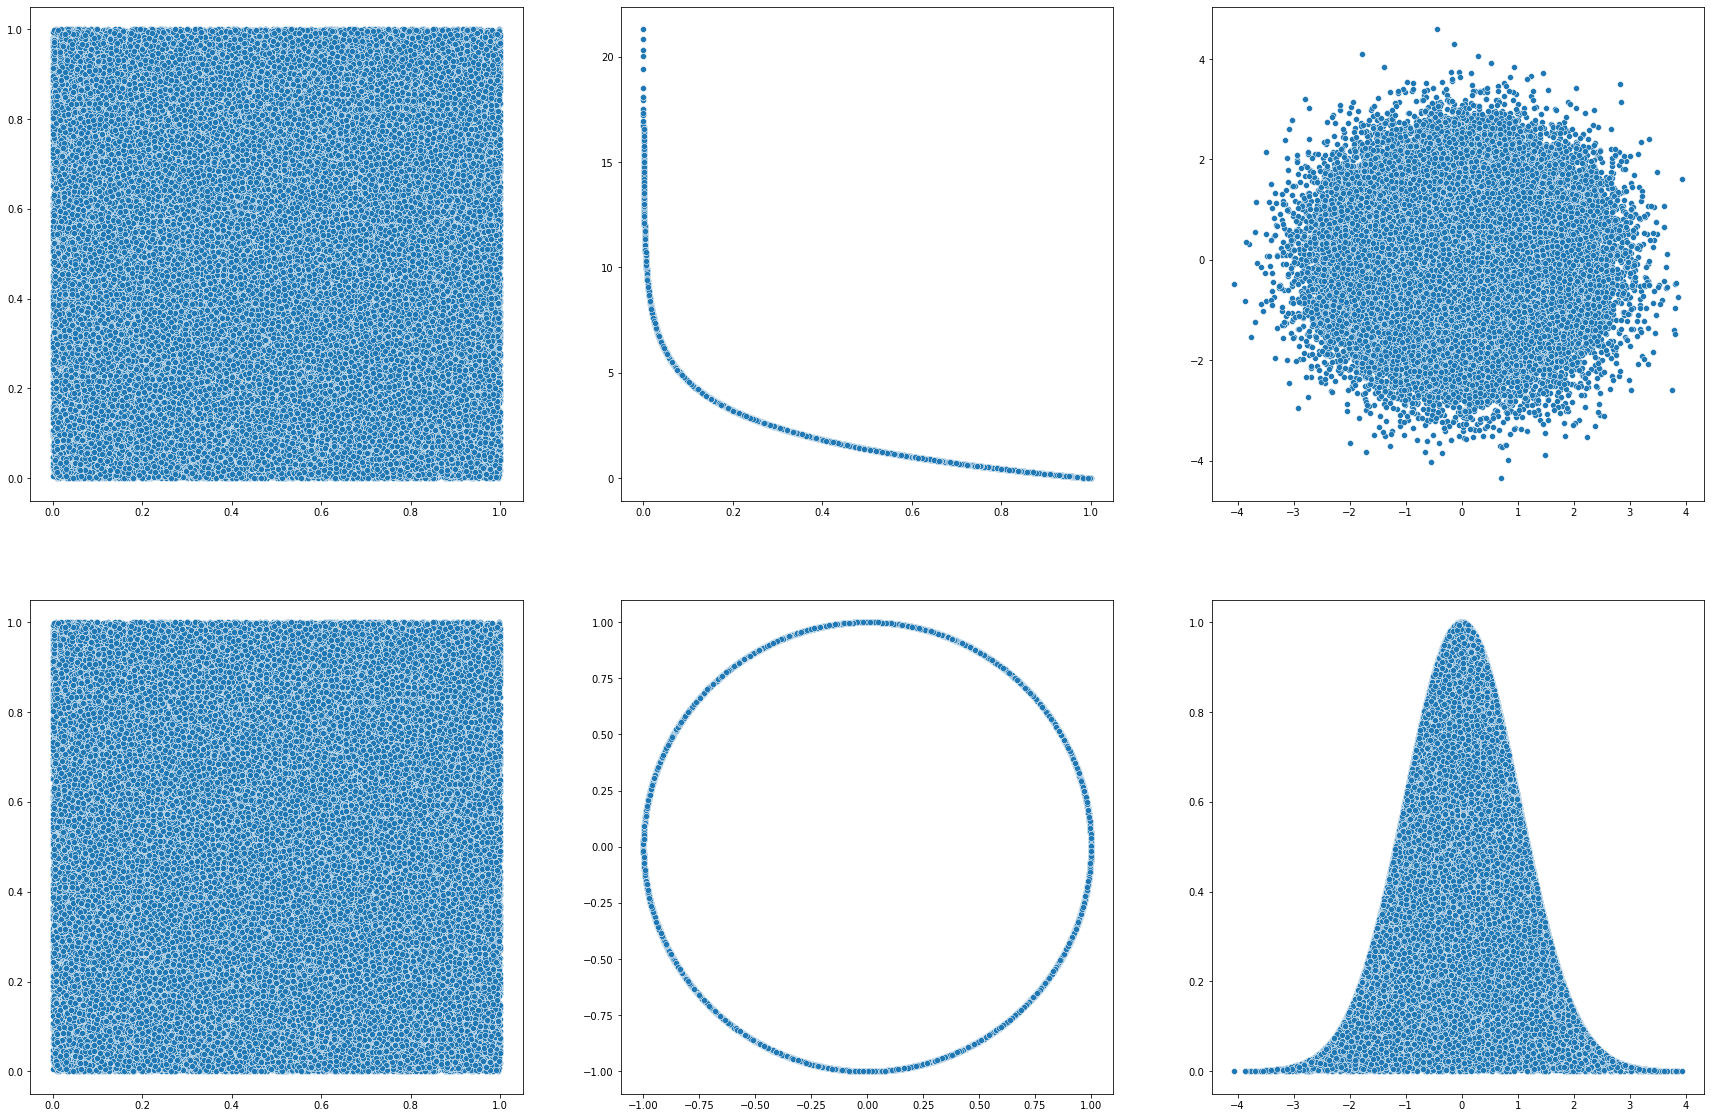

In [20]:
z1_list = []
z2_list = []
u1_list = []
u2_list = []
r_list = []
v_list = []
z1_for_circle_list = []
z2_for_circle_list = []

while True:

    if len(z1_list) != 100000:

        u1 = random.random()
        u2 = random.random()
        
        u1_list.append(u1)
        u2_list.append(u2)
        
        v = V(u2)
        r = R(u1)

        r_list.append(r)
        v_list.append(v)

        z1_list.append(Z1(r, v))
        z2_list.append(Z2(r, v))

        z1_for_circle_list.append(z1_for_circle(v))
        z2_for_circle_list.append(z2_for_circle(v))

    else:
        break


fig, ax = plt.subplots(2, 3, figsize=(30,20), facecolor='w')

sns.scatterplot(u1_list, u2_list, ax=ax[0,0])
sns.scatterplot(u1_list, r_list, ax=ax[0,1])
sns.scatterplot(z1_list, z2_list, ax=ax[0,2])
sns.scatterplot(u1_list, u2_list, ax=ax[1,0])
sns.scatterplot(z1_for_circle_list, z2_for_circle_list, ax=ax[1,1])
sns.scatterplot(z1_list, u1_list, ax=ax[1,2])



## Multivariate Normal

In [14]:
import yfinance as yf

In [15]:
df = yf.download(['TSLA', 'AAPL'], progress=False)['Close'].rename(columns={'^GSPC':'S&P500', '^KS11':'KOSPI'}).resample('m').last().pct_change().dropna()['2001-01-01':]
df.head()

,AAPL,TSLA
Date,,
2010-07-31,0.022741,-0.163240
2010-08-31,-0.055005,-0.023069
2010-09-30,0.167215,0.047741
2010-10-31,0.060722,0.070063
2010-11-30,0.033790,0.617674


In [16]:
np.asarray(df.mean())

array([0.02275898, 0.04976728])

In [17]:
np.asarray(df.cov())

array([[0.00613077, 0.00488054],
       [0.00488054, 0.03316167]])

In [18]:
x_min, x_max = df['AAPL'].min(), df['AAPL'].max()
y_min, y_max = df['TSLA'].min(), df['TSLA'].max()
x, y = np.mgrid[x_min:x_max:0.1, y_min:y_max:0.1]
pos = np.dstack((x,y))

[AAPL] x_min: -0.184 	x_max:0.214 
[TSLA] y_min: -0.246 	y_max:0.811 
mean: [0.02275898 0.04976728]


Text(0.5, 0, 'PDF')

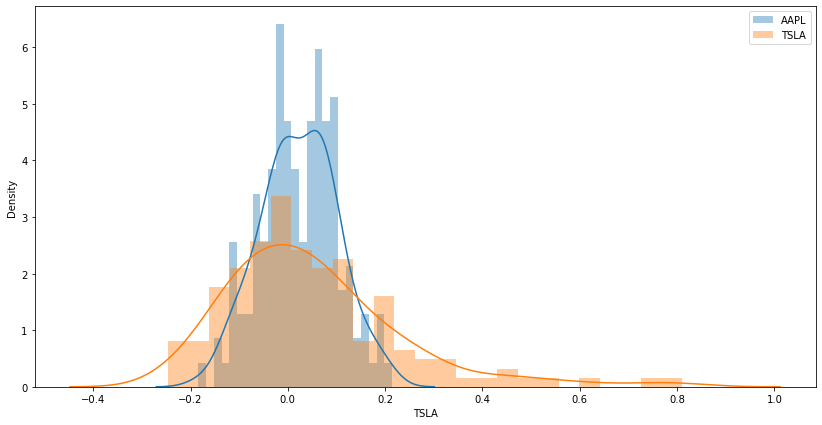

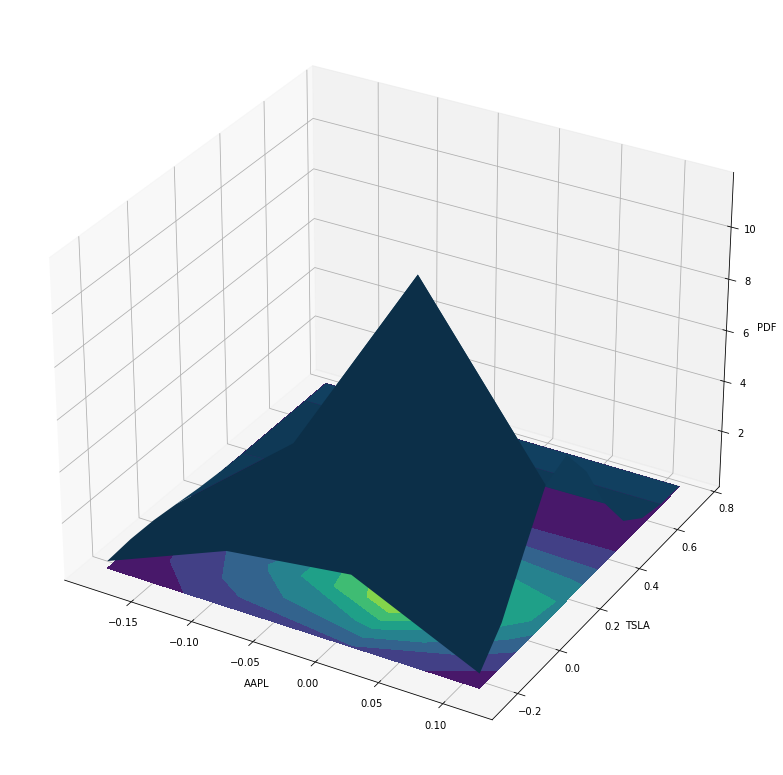

In [28]:
z = stats.multivariate_normal.pdf(pos, mean=np.asarray(df.mean()), cov=np.asarray(df.cov()))

# Visualization
print(f'[AAPL] x_min: {x_min:<6.3} \tx_max:{x_max:<6.3}')
print(f'[TSLA] y_min: {y_min:<6.3} \ty_max:{y_max:<6.3}')
print('mean:', np.asarray(df.mean()))

# First Plot
fig = plt.figure(figsize=(14,7), facecolor='w')
sns.distplot(df['AAPL'], bins=25, label='AAPL')
sns.distplot(df['TSLA'], bins=25, label='TSLA')
plt.legend()

# Second 3d Plot
fig = plt.figure(figsize=(14,14), facecolor='w')
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z, rstride=3, cstride=3, linewidth=1, antialiased=True)
ax.contourf(x, y, z, zdir='z', offset=-0.01)

# Adjust the limits, ticks and view angle
#ax.set_zlim(-0.01,0.02)
#ax.view_init(27, -21)
ax.set_xlabel('AAPL')
ax.set_ylabel('TSLA')
ax.set_zlabel('PDF')